# Analysis

Template for Jupyter notebooks running Python.

Version 0.1.0 \| First Created July 12, 2023 \| Updated August 01, 2023

## Jupyter Notebook

This is an Jupyter Notebook document. For more details on using a Jupyter Notebook see <https://docs.jupyter.org/en/latest/>.

### Setting up a computational environment. 
Please see proceedure/environment/readme.md for detailed instructions for how to replicate the computational environment used in this study.



# Title of Study

### Authors

- First Name Last Name\*, email address, @githubname, ORCID link, affiliated institution(s)
- First Name Last Name, email address, @githubname, ORCID link, affiliated institution(s)

\* Corresponding author and creator



### Abstract

Write a brief abstract about your research project.

If the project is a reproduction or replication study, include a declaration of the study type with a full reference to the original study.
For example:

This study is a *replication* of:

> citation to prior study

A graphical abstract of the study could also be included as an image here.



### Study metadata

- `Key words`: Comma-separated list of keywords (tags) for searchability. Geographers often use one or two keywords each for: theory, geographic context, and methods.
- `Subject`: select from the [BePress Taxonomy](http://digitalcommons.bepress.com/cgi/viewcontent.cgi?article=1008&context=reference)
- `Date created`: date when project was started
- `Date modified`: date of most recent revision
- `Spatial Coverage`: Specify the geographic extent of your study. This may be a place name and link to a feature in a gazetteer like GeoNames or OpenStreetMap, or a well known text (WKT) representation of a bounding box.
- `Spatial Resolution`: Specify the spatial resolution as a scale factor, description of the level of detail of each unit of observation (including administrative level of administrative areas), and/or or distance of a raster GRID size
- `Spatial Reference System`: Specify the geographic or projected coordinate system for the study, e.g. EPSG:4326
- `Temporal Coverage`: Specify the temporal extent of your study---i.e. the range of time represented by the data observations.
- `Temporal Resolution`: Specify the temporal resolution of your study---i.e. the duration of time for which each observation represents or the revisit period for repeated observations
- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

#### Original study spatio-temporal metadata

- `Spatial Coverage`: extent of original study
- `Spatial Resolution`: resolution of original study
- `Spatial Reference System`: spatial reference system of original study
- `Temporal Coverage`: temporal extent of original study
- `Temporal Resolution`: temporal resolution of original study



## Study design

Describe how the study relates to prior literature, e.g. is it a **original study**, **meta-analysis study**, **reproduction study**, **reanalysis study**, or **replication study**?

Also describe the original study archetype, e.g. is it **observational**, **experimental**, **quasi-experimental**, or **exploratory**?

Enumerate specific **hypotheses** to be tested or **research questions** to be investigated here, and specify the type of method, statistical test or model to be used on the hypothesis or question.


## Proceedure

In [46]:
# Import the necessary packages
import geopandas as gpd
import pandas as pd
import geodatasets as gds
import yaml
import os
import numpy as np
import osmnx as ox
import pyogrio
import networkx as nx
import matplotlib as plt
import folium

In [2]:
# Write the YAML file with package dependencies
##create if statement set to false so that this wont always run ***!
## code adapted from python land https://python.land/data-processing/python-yaml#What_is_YAML
requirements = """
- openpyxl
- pyyaml
"""
req = yaml.safe_load(requirements)
with open ('req.yaml', 'w') as file:
    yaml.dump(req, file)

print(open('req.yaml').read())

- openpyxl
- pyyaml



In [30]:
# move req file to envs folder 
os.replace("req.yaml", "../environment/req.yaml") 

In [31]:
path = os.path.abspath('req.yaml')
print(path)

C:\Users\gsokolow\Documents\GitHub\Flooding-and-Healthcare-2024\procedure\code\req.yaml


In [2]:
# Import 2018 Census Data for Statistical Area 1s
# Select only the columns we're interested in
sa1 = pd.read_csv("../../data/derived/public/Individual_part1_totalNZ-wide_format_updated_16-7-20_adjusted_labels.csv",
                     usecols = ['Area_code_and_description', #uniqueid for sa1 
                                'Census_2018_usually_resident_population_count', #total pop
                                'Census_2018_Sex_1_Male_CURP', 'Census_2018_Sex_2_Female_CURP', 'Census_2018_Sex_Total_CURP', #sex
                                'Census_2018_median_age_CURP', 'Census_2018_Age_broad_groups_1_Under_15_years_CURP', 'Census_2018_Age_broad_groups_2_15_to_29_years_CURP', 
                                'Census_2018_Age_broad_groups_3_30_to_64_years_CURP', 'Census_2018_Age_broad_groups_4_65_years_and_over_CURP', 
                                'Census_2018_Age_broad_groups_Total_CURP', #age
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_5_Middle_Eastern_Latin_American_African_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_CURP', #ethnicity,
                                'Census_2018_Maori_descent_01_Maori_descent_CURP', 'Census_2018_Maori_descent_02_No_Maori_descent_CURP', 'Census_2018_Maori_descent_04_Dont_know_CURP',
                                'Census_2018_Maori_descent_Total_stated_CURP', 'Census_2018_Maori_descent_99_Not_elsewhere_included_CURP', 'Census_2018_Maori_descent_Total_CURP'
                               ],
                 na_values = 'C') #replaces 'C' for confidential with NaN. 


In [3]:
# Make sure the data loaded in correctly. It did! YAY!
sa1.head()

,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,Census_2018_Sex_2_Female_CURP,Census_2018_Sex_Total_CURP,Census_2018_median_age_CURP,Census_2018_Age_broad_groups_1_Under_15_years_CURP,Census_2018_Age_broad_groups_2_15_to_29_years_CURP,Census_2018_Age_broad_groups_3_30_to_64_years_CURP,Census_2018_Age_broad_groups_4_65_years_and_over_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,SA1 7000000,141,75.0,66.0,141,48.1,24.0,30.0,69.0,21.0,...,0.0,141.0,0.0,141,135.0,6.0,3.0,141.0,0.0,141
1,SA1 7000001,114,60.0,54.0,114,36.5,30.0,21.0,48.0,18.0,...,0.0,114.0,0.0,114,96.0,18.0,0.0,114.0,0.0,114
2,SA1 7000002,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
3,SA1 7000003,225,120.0,105.0,225,30.5,57.0,54.0,75.0,36.0,...,0.0,225.0,0.0,225,210.0,15.0,0.0,225.0,0.0,225
4,SA1 7000004,138,69.0,66.0,138,52.2,24.0,15.0,69.0,30.0,...,0.0,138.0,0.0,138,102.0,30.0,3.0,138.0,0.0,138


In [4]:
## remove the leading SA1 prefix for area codes. This is necessary for the join to work with the geometric data.
sa1["Area_code_and_description"]=sa1.Area_code_and_description.str.replace("SA1 ","", regex = True)

In [5]:
# Import the definitions of the variables we are interested in (created by author based on best available information)
sa1_sel_defs = pd.read_csv("../../data/metadata/2018_Census_Statistical_Area1_Definitions_for_select_variables.csv", index_col = 0, dtype = object)

## Generate metadata
Now, we're going to generate some information about the datasets we're using.

In [7]:
samin = pd.DataFrame(sa1.min(0).rename('minimum'))

In [8]:
samax = pd.DataFrame(sa1.max(0).rename('maximum'))

In [9]:
sa1.isna().sum()

Area_code_and_description                                                                               0
Census_2018_usually_resident_population_count                                                           0
Census_2018_Sex_1_Male_CURP                                                                           575
Census_2018_Sex_2_Female_CURP                                                                         575
Census_2018_Sex_Total_CURP                                                                              0
Census_2018_median_age_CURP                                                                           592
Census_2018_Age_broad_groups_1_Under_15_years_CURP                                                    620
Census_2018_Age_broad_groups_2_15_to_29_years_CURP                                                    620
Census_2018_Age_broad_groups_3_30_to_64_years_CURP                                                    614
Census_2018_Age_broad_groups_4_65_years_and_ov

In [10]:
freqna = ((sa1.isna().sum())/len(sa1)).rename('NaN frequency')

In [11]:
sa1_types = sa1.dtypes.rename('data type')

In [12]:
#let's make a big table to display all the metadata
meta_nums = pd.DataFrame(sa1_types)
meta_nums = meta_nums.join(samin, rsuffix = 'min')
meta_nums = meta_nums.join(samax, rsuffix = 'max')
meta_nums = meta_nums.join(freqna, rsuffix = 'freq NA')
meta_nums = meta_nums.join(sa1_sel_defs)


In [13]:
meta_nums.head()

,data type,minimum,maximum,NaN frequency,definition
Area_code_and_description,object,001 Far North District,Total NZ (Ward),0.000000,unique identifier for statistical area 1
Census_2018_usually_resident_population_count,int64,0,4699755,0.000000,number of usual residents (as opposed to popul...
Census_2018_Sex_1_Male_CURP,float64,0.0,2319558.0,0.017681,number of usual male residents in 2018
Census_2018_Sex_2_Female_CURP,float64,0.0,2380197.0,0.017681,number of usual female residents in 2018
Census_2018_Sex_Total_CURP,int64,0,4699755,0.000000,total number of usual residents for which data...


In [14]:
# Save the Metadata
meta_nums.to_csv('../../data/metadata/2018_Census_Statistical_Area1_Metadata_Derived.csv')

### Calculate percentages
Deviation from analysis plan. For ease of implementation, calculate the population percentages for each of the following variables PRIOR to joining the attribute data with the statistical area 1 geometry.
    - Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP
   - Census_2018_Maori_descent_01_Maori_descent_CURP
   - Census_2018_Maori_descent_02_No_Maori_descent_CURP
   - Census_2018_Maori_descent_04_Dont_know_CURP

In [6]:
sa1_pct = sa1[
["Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP",
    "Census_2018_Maori_descent_01_Maori_descent_CURP",
    "Census_2018_Maori_descent_02_No_Maori_descent_CURP",
    "Census_2018_Maori_descent_04_Dont_know_CURP"]
].div(sa1["Census_2018_usually_resident_population_count"], axis = "rows")

In [7]:
sa1_pct.head()

,Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP,Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP
0,0.063830,0.893617,0.021277,0.0,0.0,0.957447,0.042553,0.021277
1,0.131579,0.815789,0.000000,0.0,0.0,0.842105,0.157895,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.093333,0.920000,0.013333,0.0,0.0,0.933333,0.066667,0.000000
4,0.043478,0.717391,0.021739,0.0,0.0,0.739130,0.217391,0.021739


## Read SA1 geometry data

In [7]:
sa1_geom = gpd.read_file("../../data/raw/public/statistical-area-1-2018-generalised.gpkg")

In [84]:
#districts
districts = gpd.read_file("../../data/raw/public/nz-land-districts.gpkg")

<Axes: >

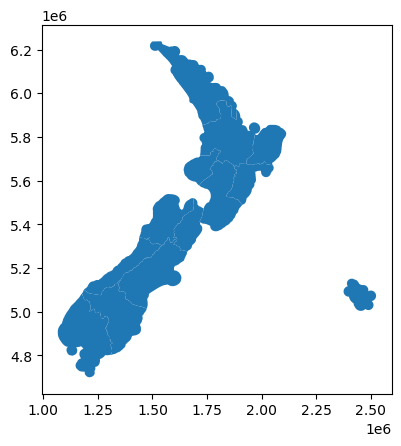

In [85]:
districts.plot()

In [86]:
districts.head() #select only hawkes bay etc and filter

,id,name,geometry
0,1001,North Auckland,"MULTIPOLYGON (((1649501.785 6169888.077, 16491..."
1,1002,South Auckland,"MULTIPOLYGON (((1837764.820 5962615.057, 18377..."
2,1003,Hawkes Bay,"MULTIPOLYGON (((1992477.504 5675492.685, 19924..."
3,1004,Gisborne,"MULTIPOLYGON (((1963177.627 5775296.689, 19631..."
4,1005,Taranaki,"MULTIPOLYGON (((1774732.060 5629052.266, 17748..."


In [8]:
sa1_geom.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647..."
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648..."
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681..."
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658..."
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848..."


In [9]:
#merge geodataframe with attribute data
sa1_geom_m = pd.merge(sa1_geom, sa1, left_on="SA12018_V1_00", right_on="Area_code_and_description")

In [10]:
sa1_geom_m.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,0.0,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,0.0,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,0.0,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,0.0,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,0.0,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141


<Axes: >

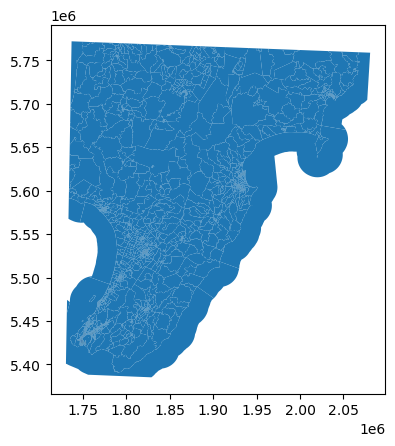

In [11]:
sa1_geom_m.plot()

### IM GOING TO NEED TO COME BACK HERE AND FILTER FOR ONLY HAWKES BAY - MAYBE USING AN OUTLINE?

In [12]:
#save the joined data
sa1_geom_m.to_file("../../data/derived/public/sa1_2018_joined.geojson", driver='GeoJSON')

In [14]:
# this would set the index of sa1_geom_m to the sa1 id to transfer to the centroids but it doesnt work :(
# sa1_geom_m.set_index(["SA12018_V1_00"])

In [15]:
#calculate the pct of the population represented by each variable by dividing by the total population


### Create Centroids
In order to work with the OSMNX graph, the centroid coordinates need to be separared.

In [13]:
sa1_c = sa1_geom_m.centroid

In [14]:
sa1_c.head()

0    POINT (1764608.921 5590887.326)
1    POINT (1765929.419 5585265.571)
2    POINT (1769630.342 5588390.698)
3    POINT (1769580.604 5586518.715)
4    POINT (1881865.661 5590612.464)
dtype: geometry

In [15]:
#sa1_c_m = sa1_geom_m.assign(centroid_x = (sa1_geom_m.centroid.get_coordinates())["x"]).assign(centroid_y = (sa1_geom_m.centroid.get_coordinates())["y"])

In [16]:
sa1_c_m = sa1_geom_m.assign(centroid_geom = (sa1_geom_m.centroid))

We need to drop the SA1 geometry so that the centroids can be the primary geography type for each SA1 area.
Ok, so that didn't work. When we drop the geometry, the dataframe is no longer a geodataframe, so rather than joining the centroid coordinates to the sa1 data, we have to join the sa1 attributes to the centroids. I'm a little worried about the indexes lining up, but i hope it works. Mayeb to be sure, I will
1. generate the centroids
2. conduct a spatial join between the centroids and the sa1 to carry over the correct sa1 id
3. join by attribute

In [17]:
#sa1_c_m = sa1_c_m.drop("geometry", axis = 1)
#instead of dropping the SA1 geometry, we can simply set the new active geometry
sa1_c_m = sa1_c_m.set_geometry("centroid_geom")

The next few cells may be redundant from a different approach


In [18]:
print(sa1_c_m[['centroid_x']].isna().sum())

centroid_x    0
dtype: int64


In [19]:
c_x = sa1_c_m[['centroid_x']].values.tolist()
c_y = sa1_c_m[['centroid_y']].values.tolist()

In [20]:
c_x1 = sa1_c_m[['centroid_x']].to_numpy()
c_y1 = sa1_c_m[['centroid_y']].to_numpy()

<Axes: >

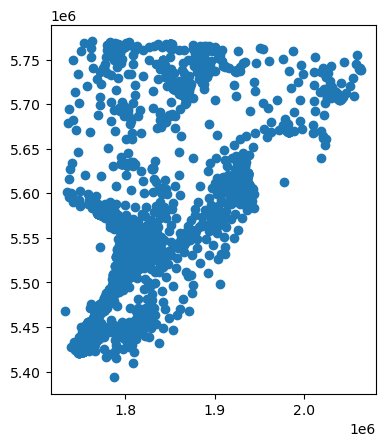

In [21]:
sa1_c.plot()

In [18]:
# in theory, this dataframe has both the sa1 id and the centroid
sa1_c_m.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP,centroid_geom
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153,POINT (1764608.921 5590887.326)
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180,POINT (1765929.419 5585265.571)
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120,POINT (1769630.342 5588390.698)
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204,POINT (1769580.604 5586518.715)
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141,POINT (1881865.661 5590612.464)


In [23]:
sa1_c.head()

0    POINT (1764608.921 5590887.326)
1    POINT (1765929.419 5585265.571)
2    POINT (1769630.342 5588390.698)
3    POINT (1769580.604 5586518.715)
4    POINT (1881865.661 5590612.464)
dtype: geometry

In [39]:
sa1_c.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Read in Health Care Provider Data
Note geopandas.points_from_xy function might be useful in streamlining the workflow/making it more transparent (as opposed to using arc)

In [19]:
gps = gpd.read_file("../../data/derived/public/GP_HB_convertedpoints.shp")

In [20]:
gps.head()

,Id,Coordinate,Name,Address,Notes,geometry
0,0,-39.994883 176.549197,Tuki Tuki Medical Center,"1 Cook Street, Waipukurau 4200",None,POINT (1903015.007 5566774.502)
1,0,-39.943788 176.586259,The Doctors Waipawa,"19 Kenilworth Street, Waipawa 4210",None,POINT (1906408.327 5572320.669)
2,0,-39.636864 176.844034,"Totara Health, Hastings","403 Nelson Street N, Hastings 4122",None,POINT (1929903.584 5605480.537)
3,0,-39.622181 176.782606,"Totara Health, Flaxmere","cnr Chatham Road & Caernarvon Drive, Flaxmere ...",None,POINT (1924699.026 5607334.904)
4,0,-39.667184 176.87987,Te Mata Peak Practice,"33-35 Napier Road, Havelock North 4130",None,POINT (1932834.325 5601981.554)


<Axes: >

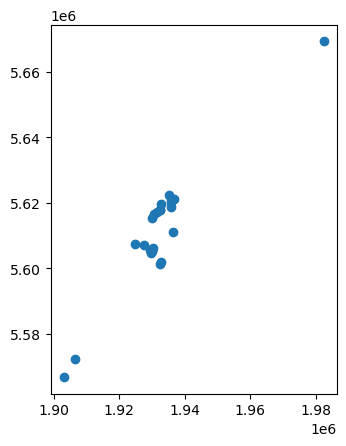

In [21]:
gps.plot()

### Read in LINZ Road Network data

In [21]:
rds = gpd.read_file("../../data/raw/public/nz-road-centrelines-topo-150k.gpkg")

<Axes: >

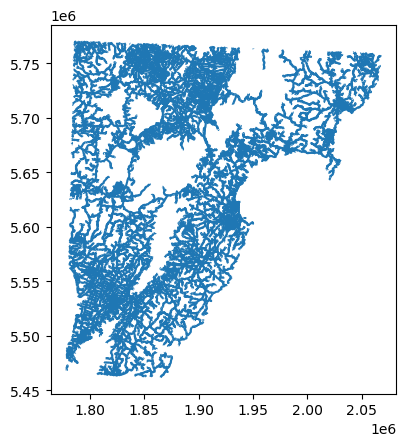

In [22]:
rds.plot()

Next, download the OSM road network data for Hawke's Bay, New Zealand. For the purposes of this analysis, we will focus on the time it takes to drive to a provider, so we will filter out other types of roads.

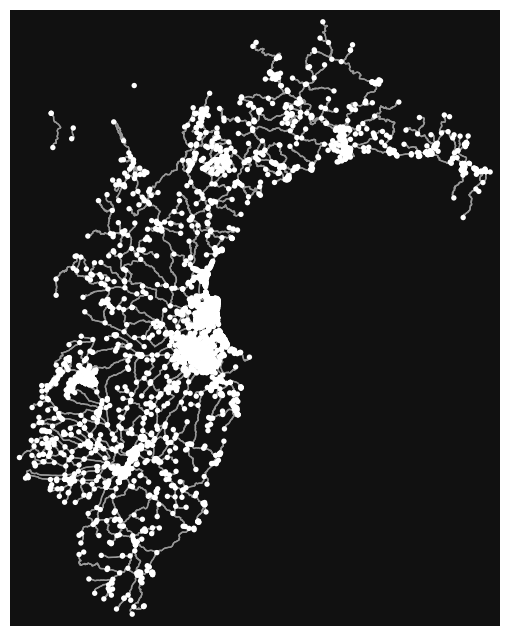

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [22]:
# alternate osm
G = ox.graph_from_place("Hawke's Bay, New Zealand", network_type = "drive", retain_all = "true")
ox.plot_graph(G)

In [23]:
#reproject
G = ox.projection.project_graph(G, "NZGD2000 / New Zealand Transverse Mercator 2000")

In [24]:
## This code from Joe Holler Replication of Kang
# Turn nodes and edges into geodataframes
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Get unique counts of road segments for each speed limit
print(edges['maxspeed'].value_counts())
print(str(len(edges)) + " edges in graph")
#should be in km per hour
#not sure what it means to have multiple [,]

# can we also visualize highways / roads with higher speed limits to check accuracy?
# the code above converts the graph into an edges geodataframe, which could theoretically be filtered
# by fast road segments and mapped, e.g. in folium

maxspeed
50               9334
100              1216
70                366
80                361
[100, 50]         121
[70, 100]          65
[70, 50]           61
[80, 50]           36
[80, 100]          26
30                 24
[70, 80]           16
60                  6
[50, 20]            4
[60, 50]            4
[60, 100]           4
[80, 60]            4
[40, 20]            2
[70, 30]            2
[80, 30]            2
10                  2
[70, 100, 50]       2
[60, 50, 40]        2
[30, 100]           2
[30, 50]            2
40                  2
[80, 60, 50]        2
[70, 80, 100]       2
[30, 40]            2
20                  1
[100, 80, 50]       1
[70, 50, 100]       1
[100, 50, 70]       1
[80, 100, 50]       1
Name: count, dtype: int64
16197 edges in graph


In [25]:
print(edges['maxspeed'].isna().sum())
#how many null values are there?

4520


There are 55122 total edges in the graph, and 33262 of them have no speed limit attribute. This needs to be addressed in order to estimate travel times to given locations. NOTE FOR FUTURE HONING -> INSERT APPROPRIATE BASE SPEED LIMIT

### NOTES TO RETURN TO FOR HONING THE NETWORK ANALYSIS
1. LINZ or OSM data? [This](https://stackoverflow.com/questions/58257528/osmnx-shortest-path-for-a-set-of-origins-and-destinations) might help with the workflow on LINZ
2. IF LINZ, how to filter?
3. If OSM, is it possible to get historic data? Is it necessary to save a particular date and read that file back in rather than querying each time?
4. What is an appropriate base speed to assign OSM roads that are missing that data?

Let's take a look at the data we've just downloaded.

In [26]:
edges.head()

osmid  \
u          v          key                                                      
357174131  1733626567 0                                             31892922   
           357174213  0                                             31892923   
           1733620211 0    [344165216, 344165217, 370128715, 370128717, 3...   
1733626567 1733626566 0                                             31892922   
           357174131  0                                             31892922   

                                      name    highway  oneway reversed  \
u          v          key                                                
357174131  1733626567 0    Porangahau Road   tertiary   False    False   
           357174213  0    Porangahau Road  secondary   False    False   
           1733620211 0     Wimbledon Road  secondary   False     True   
1733626567 1733626566 0    Porangahau Road   tertiary   False    False   
           357174131  0    Porangahau Road   tertiary   False     True   

                             length  \
u          v          key             
357174131  1733626567 0     168.068   
           357174213  0    4076.653   
           1733620211 0    8476.180   
1733626567 1733626566 0     160.284   
           357174131  0     168.068   

                                                                    geometry  \
u          v          key                                                      
357174131  1733626567 0    LINESTRING (1906438.242 5531725.788, 1906460.3...   
           357174213  0    LINESTRING (1906438.242 5531725.788, 1905730.9...   
           1733620211 0    LINESTRING (1906438.242 5531725.788, 1906435.2...   
1733626567 1733626566 0    LINESTRING (1906569.971 5531817.131, 1906683.2...   
           357174131  0    LINESTRING (1906569.971 5531817.131, 1906498.1...   

                          bridge   lanes maxspeed  ref access junction  
u          v          key                                               
357174131  1733626567 0      NaN     NaN      NaN  NaN    NaN      NaN  
           357174213  0      NaN     NaN      NaN  NaN    NaN      NaN  
           1733620211 0      yes  [2, 1]      NaN  NaN    NaN      NaN  
1733626567 1733626566 0      NaN     NaN      NaN  NaN    NaN      NaN  
           357174131  0      NaN     NaN      NaN  NaN    NaN      NaN

In [27]:
edges.columns

Index(['osmid', 'name', 'highway', 'oneway', 'reversed', 'length', 'geometry',
       'bridge', 'lanes', 'maxspeed', 'ref', 'access', 'junction'],
      dtype='object')

In [28]:
edges['highway'].value_counts()

highway
residential                      7103
unclassified                     3876
secondary                        2181
tertiary                         1761
trunk                             669
primary                           352
living_street                     105
[unclassified, residential]        34
secondary_link                     34
trunk_link                         30
tertiary_link                      17
primary_link                       13
[living_street, residential]        5
[living_street, tertiary]           4
[unclassified, tertiary]            4
rest_area                           2
[trunk, secondary]                  2
[unclassified, secondary]           2
[primary, secondary]                2
[living_street, unclassified]       1
Name: count, dtype: int64

THIS MAY BE A SPOT TO RETURN TO TO CLEAN SOME STUFF UP

In [29]:
nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
357174131,5.531726e+06,1.906438e+06,3,176.605869,-40.308799,NaN,NaN,POINT (1906438.242 5531725.788)
1733626567,5.531817e+06,1.906570e+06,3,176.607372,-40.307929,NaN,NaN,POINT (1906569.971 5531817.131)
357174213,5.534133e+06,1.903437e+06,3,176.569477,-40.288245,NaN,NaN,POINT (1903436.920 5534133.343)
1733620211,5.525193e+06,1.903137e+06,3,176.570188,-40.368743,NaN,NaN,POINT (1903136.528 5525193.106)
1733659763,5.538237e+06,1.904331e+06,3,176.578027,-40.251022,NaN,NaN,POINT (1904331.010 5538236.965)


In [30]:
nodes.shape

(7063, 8)

In [31]:
edges.shape

(16197, 13)

#### Reproject the nodes and edges to NZGD2000
Attempting to put nodes and centroids in the same projection and concatenating them failed :( 
Next thing to try would be a join by location just to get the attribute of the sa1 key onto the point?

In [33]:
nodes.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [44]:
# Reproject layers to NZGD2000 - reduntant bc whole graph projected?
#nodes = nodes.to_crs("NZGD2000 / New Zealand Transverse Mercator 2000")
#edges = edges.to_crs("NZGD2000 / New Zealand Transverse Mercator 2000")

### Conduct Network Analysis
See this helpful [tutorial](https://automating-gis-processes.github.io/2017/lessons/L7/network-analysis.html)!

In order to route between the SA1 centroids (origin points) and the primary care facilities (destination points), we need to find the closest node to each point within the network.
PLACE TO RETURN TO: WHAT IF A PROVIDER IS ON A LONG HIGHWAY AND THE SERVICE ROAD IS NOT INCLUDED? THIS COULD RELOCATE THE GRAPH FAR AWAY. iT MIGHT BE GOOD TO IMPLEMENT AN ALGORITHM TO CHECK HOW FAR EACH NODE IS FROM ITS POINT OF INTEREST

. I deleted the cells above to clean up stuff but essentially I first tried using the nearest_nodes() function and got stuck with the formatting of the input lists (package dependency issue?) so i pivoted to another approach. however, it did work with just one coordinate point. something doesn't seem right here. the nearest node is likely closer than 105 km. Let's try the approached used in this [study](https://github.com/HEGSRR/OR-VT-Pharmacy/blob/main/procedure/code/02_Pharmacy_Accessibility_Analysis.ipynb) * add author title etc

1. find nearest nodes to each centroid -> centroid nodes
2. find nearest nodes to each gp -> gp nodes
3. find nearest gp node to each centroid node
4. solve for the path

In [34]:
c_nearest_nodes = gpd.sjoin_nearest(sa1_c_m, nodes, distance_col = "distances")

In [35]:
c_nearest_nodes.head(10)

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,centroid_geom,index_right,y,x,street_count,lon,lat,highway,ref,distances
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,POINT (1764608.921 5590887.326),2079602594,5.572402e+06,1.868822e+06,1,176.146978,-39.955826,NaN,NaN,105839.910624
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,POINT (1765929.419 5585265.571),2079602594,5.572402e+06,1.868822e+06,1,176.146978,-39.955826,NaN,NaN,103693.627202
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,POINT (1769630.342 5588390.698),2079602594,5.572402e+06,1.868822e+06,1,176.146978,-39.955826,NaN,NaN,100472.068477
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,POINT (1769580.604 5586518.715),2079602594,5.572402e+06,1.868822e+06,1,176.146978,-39.955826,NaN,NaN,100240.457944
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,POINT (1881865.661 5590612.464),2079557472,5.588196e+06,1.881454e+06,3,176.287833,-39.809651,NaN,NaN,2451.199068
5,7016696,12,Mainland,122.244229,122.244229,57330.228138,"MULTIPOLYGON (((1894061.711 5601463.084, 18941...",7016696,99,57.0,...,POINT (1893638.936 5595001.215),7561706484,5.595568e+06,1.893984e+06,1,176.430665,-39.739114,NaN,NaN,663.404237
6,7016697,12,Mainland,0.777036,0.777036,3910.433777,"MULTIPOLYGON (((1895838.448 5586790.995, 18959...",7016697,192,93.0,...,POINT (1895500.917 5586506.886),3983202500,5.586483e+06,1.895526e+06,3,176.452713,-39.820286,NaN,NaN,34.842341
7,7016698,12,Mainland,60.166860,60.166860,36372.508697,"MULTIPOLYGON (((1897193.848 5588626.763, 18972...",7016698,159,93.0,...,POINT (1898548.458 5582210.425),1618534351,5.582197e+06,1.898539e+06,3,176.489800,-39.857779,NaN,NaN,16.661645
8,7016702,12,Mainland,161.857086,161.857086,90355.588897,"MULTIPOLYGON (((1872133.963 5589873.558, 18721...",7016702,108,54.0,...,POINT (1878433.359 5581835.496),7576909871,5.580815e+06,1.878283e+06,3,176.253980,-39.877092,NaN,NaN,1031.706869
9,7017537,12,Mainland,68.287062,68.287062,47330.816348,"MULTIPOLYGON (((1734148.527 5600424.166, 17341...",7017537,126,66.0,...,POINT (1736572.392 5595288.057),2079602594,5.572402e+06,1.868822e+06,1,176.146978,-39.955826,NaN,NaN,134215.304073


Alright. So, it looks like there are 4 centroids that are very far from the network (we're talking 100+km). This feels unlikely. Upon reflection, it seems that the cause of this may be that the SA1 data was not filtered by region the same way the road network data was. That's something to *go back and fix* on round 2. At the same time, it almost feels suspicious that the other cantroids fall exactly at network nodes... Which is now fixed! But man are some of these points far from the road network. Another thing to return to would be to figure out how to create lines between the centroids and their nearest nodes to better understand the implications of these big distances. Another possible improvement would be to join the centroids to the nearest edge, rather than the nearest point.*we can try that below...*

<Axes: >

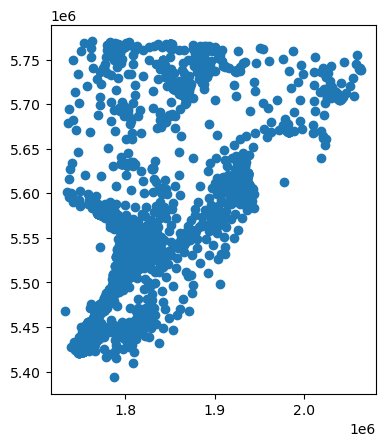

In [36]:
c_nearest_nodes.plot()

Based on the plot, we can see that the SA1 polygon geometry dominates. Perhaps that's what the networks are joining to. Let's remove that column and try again. Aaaand, now we can see it matches the centroid plots! yay!

Now let's repeat that process for the general practitioners.

In [37]:
gp_nearest_nodes = gpd.sjoin_nearest(gps, nodes, distance_col = "distances")

In [38]:
gp_nearest_nodes.head(25)

,Id,Coordinate,Name,Address,Notes,geometry,index_right,y,x,street_count,lon,lat,highway,ref,distances
0,0,-39.994883 176.549197,Tuki Tuki Medical Center,"1 Cook Street, Waipukurau 4200",None,POINT (1903015.007 5566774.502),1621241515,5.566847e+06,1.902998e+06,3,176.548964,-39.994240,NaN,NaN,74.088234
1,0,-39.943788 176.586259,The Doctors Waipawa,"19 Kenilworth Street, Waipawa 4210",None,POINT (1906408.327 5572320.669),1621235360,5.572357e+06,1.906376e+06,3,176.585865,-39.943472,NaN,NaN,48.553769
2,0,-39.636864 176.844034,"Totara Health, Hastings","403 Nelson Street N, Hastings 4122",None,POINT (1929903.584 5605480.537),382802241,5.605477e+06,1.929850e+06,4,176.843411,-39.636916,NaN,NaN,53.842602
3,0,-39.622181 176.782606,"Totara Health, Flaxmere","cnr Chatham Road & Caernarvon Drive, Flaxmere ...",None,POINT (1924699.026 5607334.904),1041877611,5.607336e+06,1.924699e+06,3,176.782608,-39.622171,NaN,NaN,1.174221
4,0,-39.667184 176.87987,Te Mata Peak Practice,"33-35 Napier Road, Havelock North 4130",None,POINT (1932834.325 5601981.554),1213028936,5.601934e+06,1.932826e+06,3,176.879796,-39.667611,NaN,NaN,47.845322
5,0,-39.637561 176.844508,The Hastings Health Centre,"303 St Aubyn Street W, Hastings 4122","also has an Urgent Care Centre, Padiology at H...",POINT (1929940.949 5605401.421),3949444326,5.605354e+06,1.929936e+06,3,176.844476,-39.637988,NaN,NaN,47.539178
6,0,-39.642757 176.842848,The Doctors Hastings,"110 Russell Street S, Hastings 4122",None,POINT (1929773.721 5604830.561),604991296,5.604823e+06,1.929738e+06,4,176.842436,-39.642838,NaN,NaN,36.454671
7,0,-39.635699 176.836987,Medical + Injury Health Centre,"615 Heretaunga Street W, Hastings 4120",None,POINT (1929304.168 5605635.806),986327377,5.605648e+06,1.929262e+06,3,176.836494,-39.635606,NaN,NaN,43.598391
8,0,-39.628692 176.848925,Mahora Medical,"900 Tomoana Road, Mahora, Hastings 4120",None,POINT (1930362.448 5606369.873),1214613415,5.606322e+06,1.930374e+06,3,176.849082,-39.629119,NaN,NaN,49.322380
9,0,-39.671915 176.874949,The Havelock North Health Centre,"26 Middle Road, Havelock North 4130",None,POINT (1932389.294 5601474.562),11254276731,5.601462e+06,1.932406e+06,3,176.875152,-39.672017,NaN,NaN,20.846601


This looks pretty good! Of the 25 GPs, all but 1 are within 100 metres of their nearest node. The one GP that's more than 100 metres away is still less than 0.25 km, and it makes sense that it might be set further back from the road as it is a part of a hospital network.

Now, for each centroid, we want to identify the closest GP. We do NOT want to do the reverse - that would leave many centroids out! 

The question remains... how to do this?
https://www.geeksforgeeks.org/introduction-to-dijkstras-shortest-path-algorithm/
https://www.baeldung.com/cs/shortest-path-to-nodes-graph#:~:text=To%20calculate%20the%20shortest%20paths%2C%20we%20have%20two,don%E2%80%99t%20have%20a%20large%20number%20of%20nodes.%20

Dijkstras algorithm seems promising based on the proportion of edges to nodes^2



Create origin destination matrix with nested loops of network analysis
add an iterative print statement and time check to make sure its working'
potential to use k nearest neighbors to identify likely practices first to reduce algorythmic complexity
maybe map first to see about doing that

for road data, will need to create manually a 'worst case scenario' map and run the network again


In [39]:
gp_nearest_nodes = gpd.sjoin_nearest(gps, nodes, distance_col = "distances")

Let's plot the centroids over the road network.

In [72]:
## save graph as gpkg to then read in to folium map
ox.io.save_graph_shapefile(G, "../../data/derived/public/G_test_3_11.shp")

C:\Users\gsokolow\AppData\Local\Temp\ipykernel_4580\4236447297.py:2: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.io.save_graph_shapefile(G, "../../data/derived/public/G_test_3_11.shp")
C:\Users\gsokolow\.conda\envs\oxnz\Lib\site-packages\osmnx\io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [73]:
G_gpkg = gpd.read_file("../../data/derived/public/G_test_3_11.shp")

In [57]:
m = folium.Map(location = (-39.200503, 176.731270), zoom_start = 8, tiles = G)
folium.PolyLine(G).add_to(m)
m

AttributeError: 'MultiDiGraph' object has no attribute 'lower'

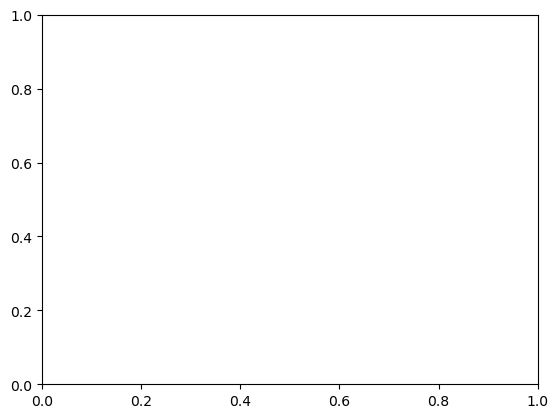

In [80]:
fig, ax = plt.pyplot.subplots()

<Axes: >

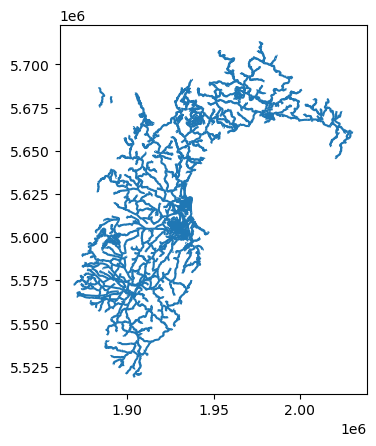

In [74]:
G_gpkg.plot()

In [81]:
G_gpkg.plot(ax=ax, color='blue', edgecolor='black')

<Axes: >

<Figure size 640x480 with 0 Axes>

In [82]:
sa1_c_m.plot(ax=ax, marker='o', color='red', markersize=5)

<Axes: >

<Figure size 640x480 with 0 Axes>

In [77]:
plt.pyplot.show()

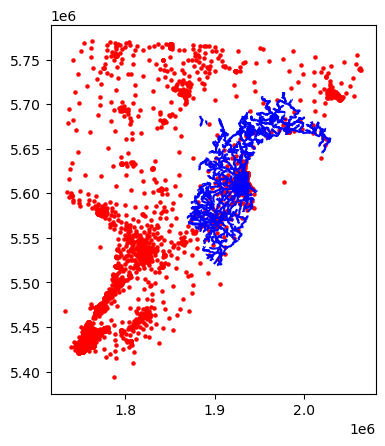

In [83]:
fig

### Analysis

Describe the methods of analysis that will directly test the hypotheses or provide results to answer the research questions.
This section should explicitly define any spatial / statistical *models* and their *parameters*, including *grouping* criteria, *weighting* criteria, and *significance thresholds*.
Also explain any follow-up analyses or validations.



## Results

Describe how results are to be presented.



## Discussion

Describe how the results are to be interpreted *vis a vis* each hypothesis or research question.



## Integrity Statement

Include an integrity statement - The authors of this preregistration state that they completed this preregistration to the best of their knowledge and that no other preregistration exists pertaining to the same hypotheses and research.
If a prior registration *does* exist, explain the rationale for revising the registration here.



# Acknowledgements

- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

This report is based upon the template for Reproducible and Replicable Research in Human-Environment and Geographical Sciences, DOI:[10.17605/OSF.IO/W29MQ](https://doi.org/10.17605/OSF.IO/W29MQ)

## References